In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_pickle("C:/Users/User/1Ironhack/DATA/Visualising_Real_Time_Data_Project/airbnb_listings_price_normalized.pkl")
df = df.rename(columns={"Review Scores Rating": "Review_Scores_Rating"})
df.dtypes

Listing ID                             object
Name                                   object
Host ID                                object
Host Name                              object
Host Response Rate                    float64
Host Is Superhost                        bool
Host total listings count             float64
Country                                object
latitude                              float64
longitude                             float64
Property type                          object
Room type                              object
Accommodates                            int64
Bathrooms                             float64
Bedrooms                              float64
Amenities                              object
Price                                 float64
Minimum nights                          int64
Maximum nights                          int64
Availability 365                        int64
Calendar last scraped          datetime64[ns]
Number of reviews                 

In [3]:
# Inspecting the distribution of the 'Amenity_Count' column

In [4]:
df['Amenity_Count'].describe()

count    380224.000000
mean         16.109599
std           6.280906
min           1.000000
25%          12.000000
50%          15.000000
75%          20.000000
max          87.000000
Name: Amenity_Count, dtype: float64

In [5]:
df['Amenity_Count'].mode()

0    14
dtype: int64

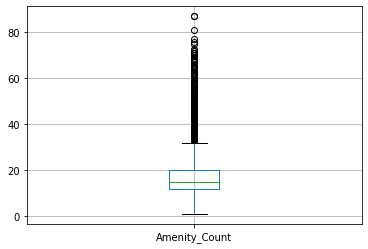

In [6]:
df.boxplot(column='Amenity_Count');

### How are the number of amenities per listing distributed?
* The average number of amenities for the listings with reviews is 16.
* The median is 15 amenities.
* The most common number of amenities (mode) is 14.
* The maximum number of amenities is 87.
* Only 25% of the listings have more than 19 amenities though.
* The IQR ist 8.
* Outliers are usually defined at 1.5 x IQR for both, the areas below the 25 percentile and above the 75 percentile.
* In our case this would define outliers as all above 32 and none on the low end.
* We chose to cut the outliers at 30 which represents 97.5% of total listings.

In [44]:
# Inspecting the distribution of the 'Review_Scores_Rating' column

In [45]:
df['Review_Scores_Rating'].describe()

count    380224.000000
mean         93.088024
std           8.373247
min          20.000000
25%          90.000000
50%          95.000000
75%         100.000000
max         100.000000
Name: Review_Scores_Rating, dtype: float64

In [46]:
df['Review_Scores_Rating'].mode()

0    100.0
dtype: float64

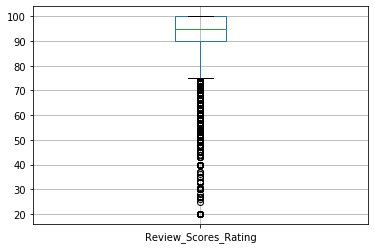

In [47]:
df.boxplot(column='Review_Scores_Rating');

In [11]:
df['Review_Scores_Rating'].quantile(.08)

80.0

In [12]:
df['Review_Scores_Rating'].quantile(.03)

75.0

### How are the Review Score Ratings distributed?
* The average review score rating for all listings is 93.
* The median is 95.
* The most common review score rating (mode) is falling together with maximum review score rating of 100.
* The IQR for this distribution is 10.
* At 1.5 x IQR, outliers are review score ratings below 75 and none at the high end.
* Only 25% of the review score ratings are below 90.
* Only 8% of the review score ratings are below 80.
* Only 3% of the review scores are below 75.

### Taking all of this into account, the Review Score Ratings distribution is heavily skewed and may not be best suited for further anlysis. So we want to include other veriables as well, when looking at the affect of the amenity counts.

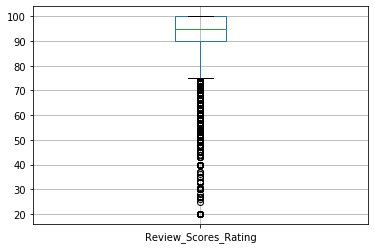

In [13]:
df.boxplot(column='Review_Scores_Rating');

In [49]:
# creating a new datset just with amenity count, review score rating, rating count and normalized, which is the price divided by the country average price
df1=df.groupby('Amenity_Count').agg({'Review_Scores_Rating' : 'mean'})
df2=df.groupby('Amenity_Count').agg({'Review_Scores_Rating' : 'count'})
df2a=df1.merge(df2, on="Amenity_Count")
df2b=df.groupby('Amenity_Count').agg({'Normalized' : 'mean'})
df2c=df.groupby('Amenity_Count').agg({'Reviews per month' : 'sum'})

df3a=df2a.merge(df2b, on='Amenity_Count')
df3b= df3a.merge(df2c, on= 'Amenity_Count')
df3 = df3b.assign(avg_monthly_review_per_listing=(df3b['Reviews per month']/df3b['Review_Scores_Rating_y']))              
#renaming column names
df4=df3.rename(columns={"Review_Scores_Rating_y": "#of_listings", "Review_Scores_Rating_x": "Avg_Rating"})
df4.reset_index(inplace=True)
df4

,Amenity_Count,Avg_Rating,#of_listings,Normalized,Reviews per month,avg_monthly_review_per_listing
0,1,90.033854,384,0.847494,468.39,1.219766
1,2,91.492696,753,0.705259,869.17,1.154276
2,3,89.775815,736,0.728585,699.20,0.950000
3,4,88.804615,1300,0.696258,1323.10,1.017769
4,5,89.317055,2703,0.734130,2617.35,0.968313
...,...,...,...,...,...,...
73,75,95.000000,1,1.015211,1.70,1.700000
74,76,96.000000,1,1.840916,3.38,3.380000
75,77,98.000000,1,2.030422,5.63,5.630000
76,81,99.000000,1,4.422198,3.33,3.330000


### In average, which review scores match the specific number of amenities offered ?

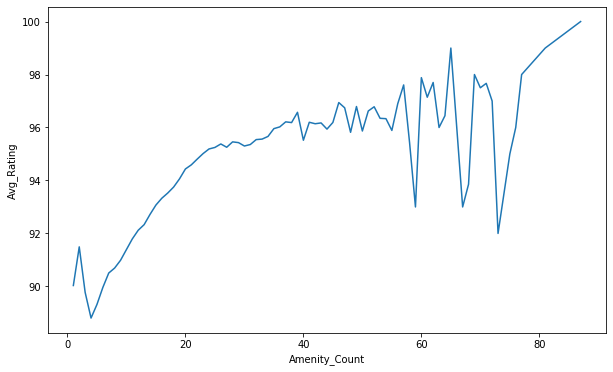

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
ax=sns.lineplot(data=df4, x='Amenity_Count', y='Avg_Rating');

### Review Scores for outlying amenities vary greatly!
* Is this variation for outliers caused by dimishing numbers of reviews for higher amenity count?

In [17]:
# Inspecting the distribution of the '#of_listings' column

In [18]:
df4['#of_listings'].describe()

count       78.000000
mean      4874.666667
std       8392.931491
min          1.000000
25%         19.750000
50%        391.500000
75%       4850.000000
max      27233.000000
Name: #of_listings, dtype: float64

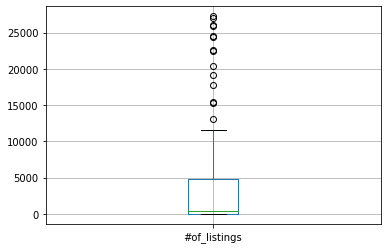

In [19]:
df4.boxplot(column='#of_listings');

### How are the Rating_Count numbers distributed  in our new  table of aggregates?
* The average Rating_Count per Amenity_Count reviewed is 4875
* The median is 392.
* The maximum number for Rating_Count is 27233.
* The IQR is 4830.25.
* Outliers are usually defined at 1.5 x IQR both, below the 25 percentile and above the 75 percentile.
* In our case this would define outliers as all above 12095 none on the low end.

### Is this a good representation of whats actually happening ? 
* For airbnb hosts a high number of ratings is actually a very attractive asset to have, as it accounts for popularity of his offering.

#### Lets find out, how many listings are showing what specific number of amenities ? 

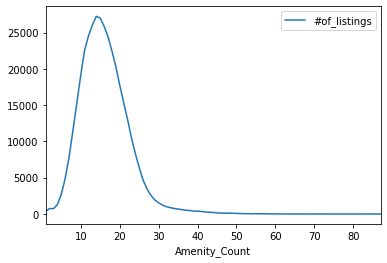

In [21]:
df4.plot(x='Amenity_Count', y='#of_listings');

In [51]:
df4.loc[df4['#of_listings'].idxmax()]

Amenity_Count                        14.000000
Avg_Rating                           92.719164
#of_listings                      27233.000000
Normalized                            0.947455
Reviews per month                 37791.810000
avg_monthly_review_per_listing        1.387721
Name: 13, dtype: float64

### The largest group of listings has an amenity count of 14 and is 27233 listings strong. 
* The most popular listings by amenity count form a bell curve. 
* A long tail begins between 28 and 32 amenities. 
* The number of listings for amenity beyond 30 are comparably low and decreases to 1.

#### In order to exclude outliers it is therefore feasable to set a cut-off-value for the number of amenities at 30.

In [52]:
# eliminating amenity counts greater 30 
df5=df4[df4.Amenity_Count<=30]

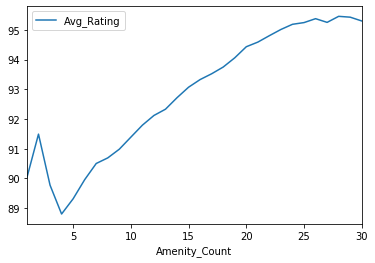

In [24]:
# plotting the average rating as a relationship with number of Amenities offered
df5.plot(x='Amenity_Count', y='Avg_Rating');

In [25]:
df5.loc[df5['Avg_Rating'].idxmax()]

Amenity_Count                       28.000000
Avg_Rating                          95.457209
#of_listings                      2594.000000
Normalized                           1.208381
Reviews per month                 6450.870000
avg_monthly_review_per_listing       2.486843
Name: 27, dtype: float64

### after an initial slump between 1 to 4, the average rating thereafter increases steadily to a maximum of 95.45 at 28 amenities

#### We need to find out what at what rate/ slope thisa increase takes place

In [ ]:
Linear regression on amenity count <30 vs ratings

In [ ]:
sns.regplot(x='Amenity_Count', y='Avg_Rating', data=df5);

In [54]:
x=df5['Amenity_Count']
y=df5['Avg_Rating']
result = scipy.stats.linregress(x, y)
result.slope

0.23439103658036609

#### The slope is 0.2344. With each amenity I add, my rating in average increases by 0.2344.

In [55]:
result.rvalue

0.959843094388523

#### The R-value at about 0.96 shows a strong positive linear relationship beween the two variables.

In [56]:
result.pvalue

5.429964583811403e-17

#### The very small p-value < 0.05 indicates strong evidence against the null hypothesis, so we reject the null hypothesis that there is no relationship between number of amenities offered up to the value of 30 and the average rating achieved.

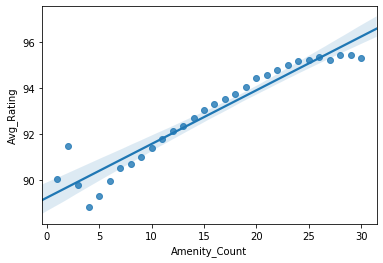

### Inspect the relationship of listings with more than 30 amenities and their respective review score rating.

In [57]:
# eliminating amenity counts with 30 or less
df6=df4[df4.Amenity_Count>30]

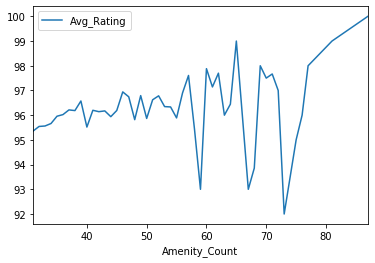

In [58]:
df6.plot(x='Amenity_Count', y='Avg_Rating');

* Linear regression on listings with Amenity_Count >30 vs their Avg_Rating

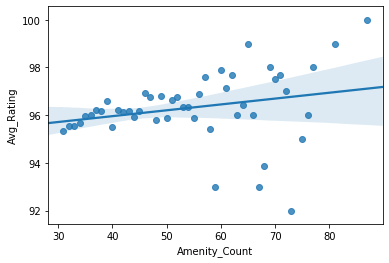

In [61]:
sns.regplot(x='Amenity_Count', y='Avg_Rating', data=df6);

In [59]:
# Inspecting the maximum Avg_Rating for Amenity Counts > 30
df6.loc[df6['Avg_Rating'].idxmax()]

Amenity_Count                      87.000000
Avg_Rating                        100.000000
#of_listings                        2.000000
Normalized                          2.336714
Reviews per month                  10.510000
avg_monthly_review_per_listing      5.255000
Name: 77, dtype: float64

We know from previous analysis that about 25% of all ratings are at 100.
In this distribution the average rating maximum lieas at 100 and it coincides with the maximum number of 87 amenities. For this combination we only find 2 listings associated with it though, which explains the high average.


In [37]:
result.rvalue

0.24700270082420997

#### The low R-value shows that there is only a very weak positive linear relationship beween the two variables.

In [38]:
result.pvalue

0.09054824024827367

#### The  p-value  of 0.09 indicates no evidence against the null hypothesis, so we can't reject the null hypothesis that there is no relationship between number of amenities offered more than 30 and the average rating achieved.

In [62]:
x=df6['Amenity_Count']
y=df6['Avg_Rating']
result = scipy.stats.linregress(x, y)
result.slope

0.024576173976777384

In [ ]:
#### Given the very weak relationship the slope is actually of not much importance. Would there be a stronger relationship, one could argue that with each increase in amenities a better average rating of 0.024 is associated.

### We want to look at the full picture with a graph that can visualize multiple dimensions at once.

Employing plotly we can view simultaneously:
    * Amenity Count
    * Average Rating of amenity count group
    * # of listings per amenity count group
    * price normalized by country average (color)
    * monthly avg # of reviews per listing in the amenity count group(size)

In [64]:
# using plotly to do a 3d scatter plot
fig = px.scatter_3d(df4, x='Amenity_Count', y='Avg_Rating', z='#of_listings', color ="Normalized", size='avg_monthly_review_per_listing')
fig.show()

In [39]:
result.stderr

0.014215562895791286